In [1]:
import os
import sys
import pandas as pd
import numpy as np
import statistics
import scipy as sp

In [2]:
data = pd.read_csv("listings.csv", sep=",")

In [3]:
data.iloc[:3]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,18666,Flat with Sunny Terrace,71615,Mireia And Maria,Sant Martí,el Camp de l'Arpa del Clot,41.40889,2.18555,Entire home/apt,130,3,1,2015-10-10,0.02,30,304
1,18674,Huge flat for 8 people close to Sagrada Familia,71615,Mireia And Maria,Eixample,la Sagrada Família,41.40420,2.17306,Entire home/apt,60,1,20,2019-10-19,0.25,30,312
2,23197,FORUM DELUXE 5 MINS WALK CCIB CENTER & SEA!,90417,Etain (Marnie),Sant Martí,el Besòs i el Maresme,41.41203,2.22114,Entire home/apt,210,3,51,2019-09-29,0.48,2,359


In [4]:
# Now let's remove the outliers

def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [13]:
lower_range,upper_range = outlier_treatment(data.price)

#outliers = data[(data.price < lower_range) | (data.price > upper_range)]

data.drop(data[(data.price < lower_range) | (data.price > upper_range)].index , inplace=True)

### 1) We want to make categories for the apartments: 

​Really cheap (cheaper than one standard deviation of the price distribution ─we assume it Normal─ to the lower side), 

​Cheap (between the really cheap ones and the average price),

​Expensive (between the average and one standard deviation to higher side), and 

​Really expensive ​(more than one standard deviation to the higher side).

How many apartments have each category?

In [15]:
# First let's compute the standard deviation with the built in statistics module
stdev = statistics.stdev(data.price)
mean = statistics.mean(data.price)
print("The standard deviation is:", round(stdev,2) ,"with mean:", round(mean,2))

The standard deviation is: 43.34 with mean: 69.55


In [16]:
really_cheap =  data[data['price'] < mean-stdev]
print ("Found", len(really_cheap),"really cheap apartments less than:", round(mean-stdev,2),"€")
really_cheap.iloc[:3]

Found 2095 really cheap apartments less than: 26.22 €


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
62,147275,1 Room INDIVIDUAL in Barcelona,711907,Antuan,Horta-Guinardó,el Guinardó,41.42318,2.17501,Private room,14,4,91,2019-10-26,1.66,1,313
74,179550,Room for rent in BCN/ non smoker,859557,Montse,Sant Andreu,Sant Andreu,41.43484,2.19234,Private room,20,10,6,2016-12-01,0.06,1,98
83,193923,Single room in the real Barcelona,939590,Mónica,Horta-Guinardó,Horta,41.43846,2.15560,Private room,20,3,123,2019-10-06,1.23,1,305


In [17]:
cheap = data[(data['price'] > mean-stdev) & (data['price'] <= mean)]
print ("Found", len(cheap),"cheap apartments between prices:", round(mean-stdev,2), "and", round(mean,2),"€")
cheap.iloc[:3]

Found 9140 cheap apartments between prices: 26.22 and 69.55 €


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1,18674,Huge flat for 8 people close to Sagrada Familia,71615,Mireia And Maria,Eixample,la Sagrada Família,41.40420,2.17306,Entire home/apt,60,1,20,2019-10-19,0.25,30,312
3,25786,NICE ROOM AVAILABLE IN THE HEART OF GRACIA,108310,Pedro,Gràcia,la Vila de Gràcia,41.40145,2.15645,Private room,32,1,268,2019-11-06,2.38,1,46
4,31958,"Gaudi Attic 1, Friendly Rentals",136853,Fidelio,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.40950,2.15938,Entire home/apt,60,1,182,2019-10-16,1.71,39,324


In [18]:
expensive = data[(data['price'] > mean) & (data['price'] <= mean + stdev)]
print ("Found", len(expensive),"expensive apartments between prices:", round(mean,2), "and", round(mean+stdev,2),"€")
expensive.iloc[:3]

Found 4436 expensive apartments between prices: 69.55 and 112.89 €


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
5,32471,"Gaudi Attic 2, Friendly Rentals",136853,Fidelio,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.40928,2.16112,Entire home/apt,70,1,90,2019-11-05,0.84,39,326
8,34241,Private Double room - Plaza Real,73163,Andres,Ciutat Vella,el Barri Gòtic,41.37916,2.17535,Private room,100,5,8,2013-07-15,0.07,2,180
20,58512,Stylish & cozy 3BR near Sagrada Familia,280070,Cristina,Sant Martí,el Camp de l'Arpa del Clot,41.41099,2.18119,Entire home/apt,105,5,376,2019-10-29,3.59,1,229


In [19]:
really_expensive = data[(data['price'] > mean+stdev) ]
print ("Found", len(really_expensive),"really expensive apartments higher than:", round(mean+stdev,2),"€")
really_expensive.iloc[:3]

Found 3043 really expensive apartments higher than: 112.89 €


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,18666,Flat with Sunny Terrace,71615,Mireia And Maria,Sant Martí,el Camp de l'Arpa del Clot,41.40889,2.18555,Entire home/apt,130,3,1,2015-10-10,0.02,30,304
7,32711,Sagrada Familia area - Còrsega 1,135703,Nick,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.40464,2.16954,Entire home/apt,140,2,59,2019-10-19,0.58,14,350
15,40983,Classical loft close to pedrera!,177617,Joaquin,Eixample,la Dreta de l'Eixample,41.39560,2.16761,Entire home/apt,130,2,327,2019-11-02,3.20,3,0


Therefore result is the next one:

Really cheap apartments: 2095

Cheap apartments: 9140

Expensive apartments: 4436

Really expensive apartments: 3043


In [24]:
# And let's create a new vector with this classification
data['price_class'] = 'None'

data.price_class[data.price < mean-stdev] = 'really_cheap'
data.price_class[(data['price'] > mean-stdev) & (data['price'] <= mean)] = 'cheap'
data.price_class[(data['price'] > mean) & (data['price'] <= mean+stdev)] = 'expensive'
data.price_class[data.price > mean+stdev] = 'really_expensive'

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: Setti

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_class
0,18666,Flat with Sunny Terrace,71615,Mireia And Maria,Sant Martí,el Camp de l'Arpa del Clot,41.40889,2.18555,Entire home/apt,130,3,1,2015-10-10,0.02,30,304,really_expensive
1,18674,Huge flat for 8 people close to Sagrada Familia,71615,Mireia And Maria,Eixample,la Sagrada Família,41.40420,2.17306,Entire home/apt,60,1,20,2019-10-19,0.25,30,312,cheap
3,25786,NICE ROOM AVAILABLE IN THE HEART OF GRACIA,108310,Pedro,Gràcia,la Vila de Gràcia,41.40145,2.15645,Private room,32,1,268,2019-11-06,2.38,1,46,cheap


### 2) We want to know what feature defines better the price between the following features:
    
neighbourhood_group, neighbourhood, latitude, longitude, room_type, minimum_nights, number_of_reviews, reviews_per_month, availability_365.
#### Make a Decision Tree Classifier, plot the resulting decision tree and draw your conclusions.

In [ ]:
# First of all, we need to convert the categorical variables into dummy variables. For this let's use Pandas.

In [25]:
from sklearn.model_selection import train_test_split
from sklearn import tree

data = data.dropna()

X  = data[['neighbourhood_group','neighbourhood', 'latitude','longitude','room_type','minimum_nights','number_of_reviews', 'reviews_per_month','availability_365']]
X = pd.get_dummies(X, columns = ['neighbourhood_group', 'neighbourhood', 'room_type'])
y = data['price_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


In [26]:
# Let's generate the tree model

model = tree.DecisionTreeClassifier()

In [27]:
# And train it

model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [28]:
# And predict the data

y_predict = model.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.5421946616338635

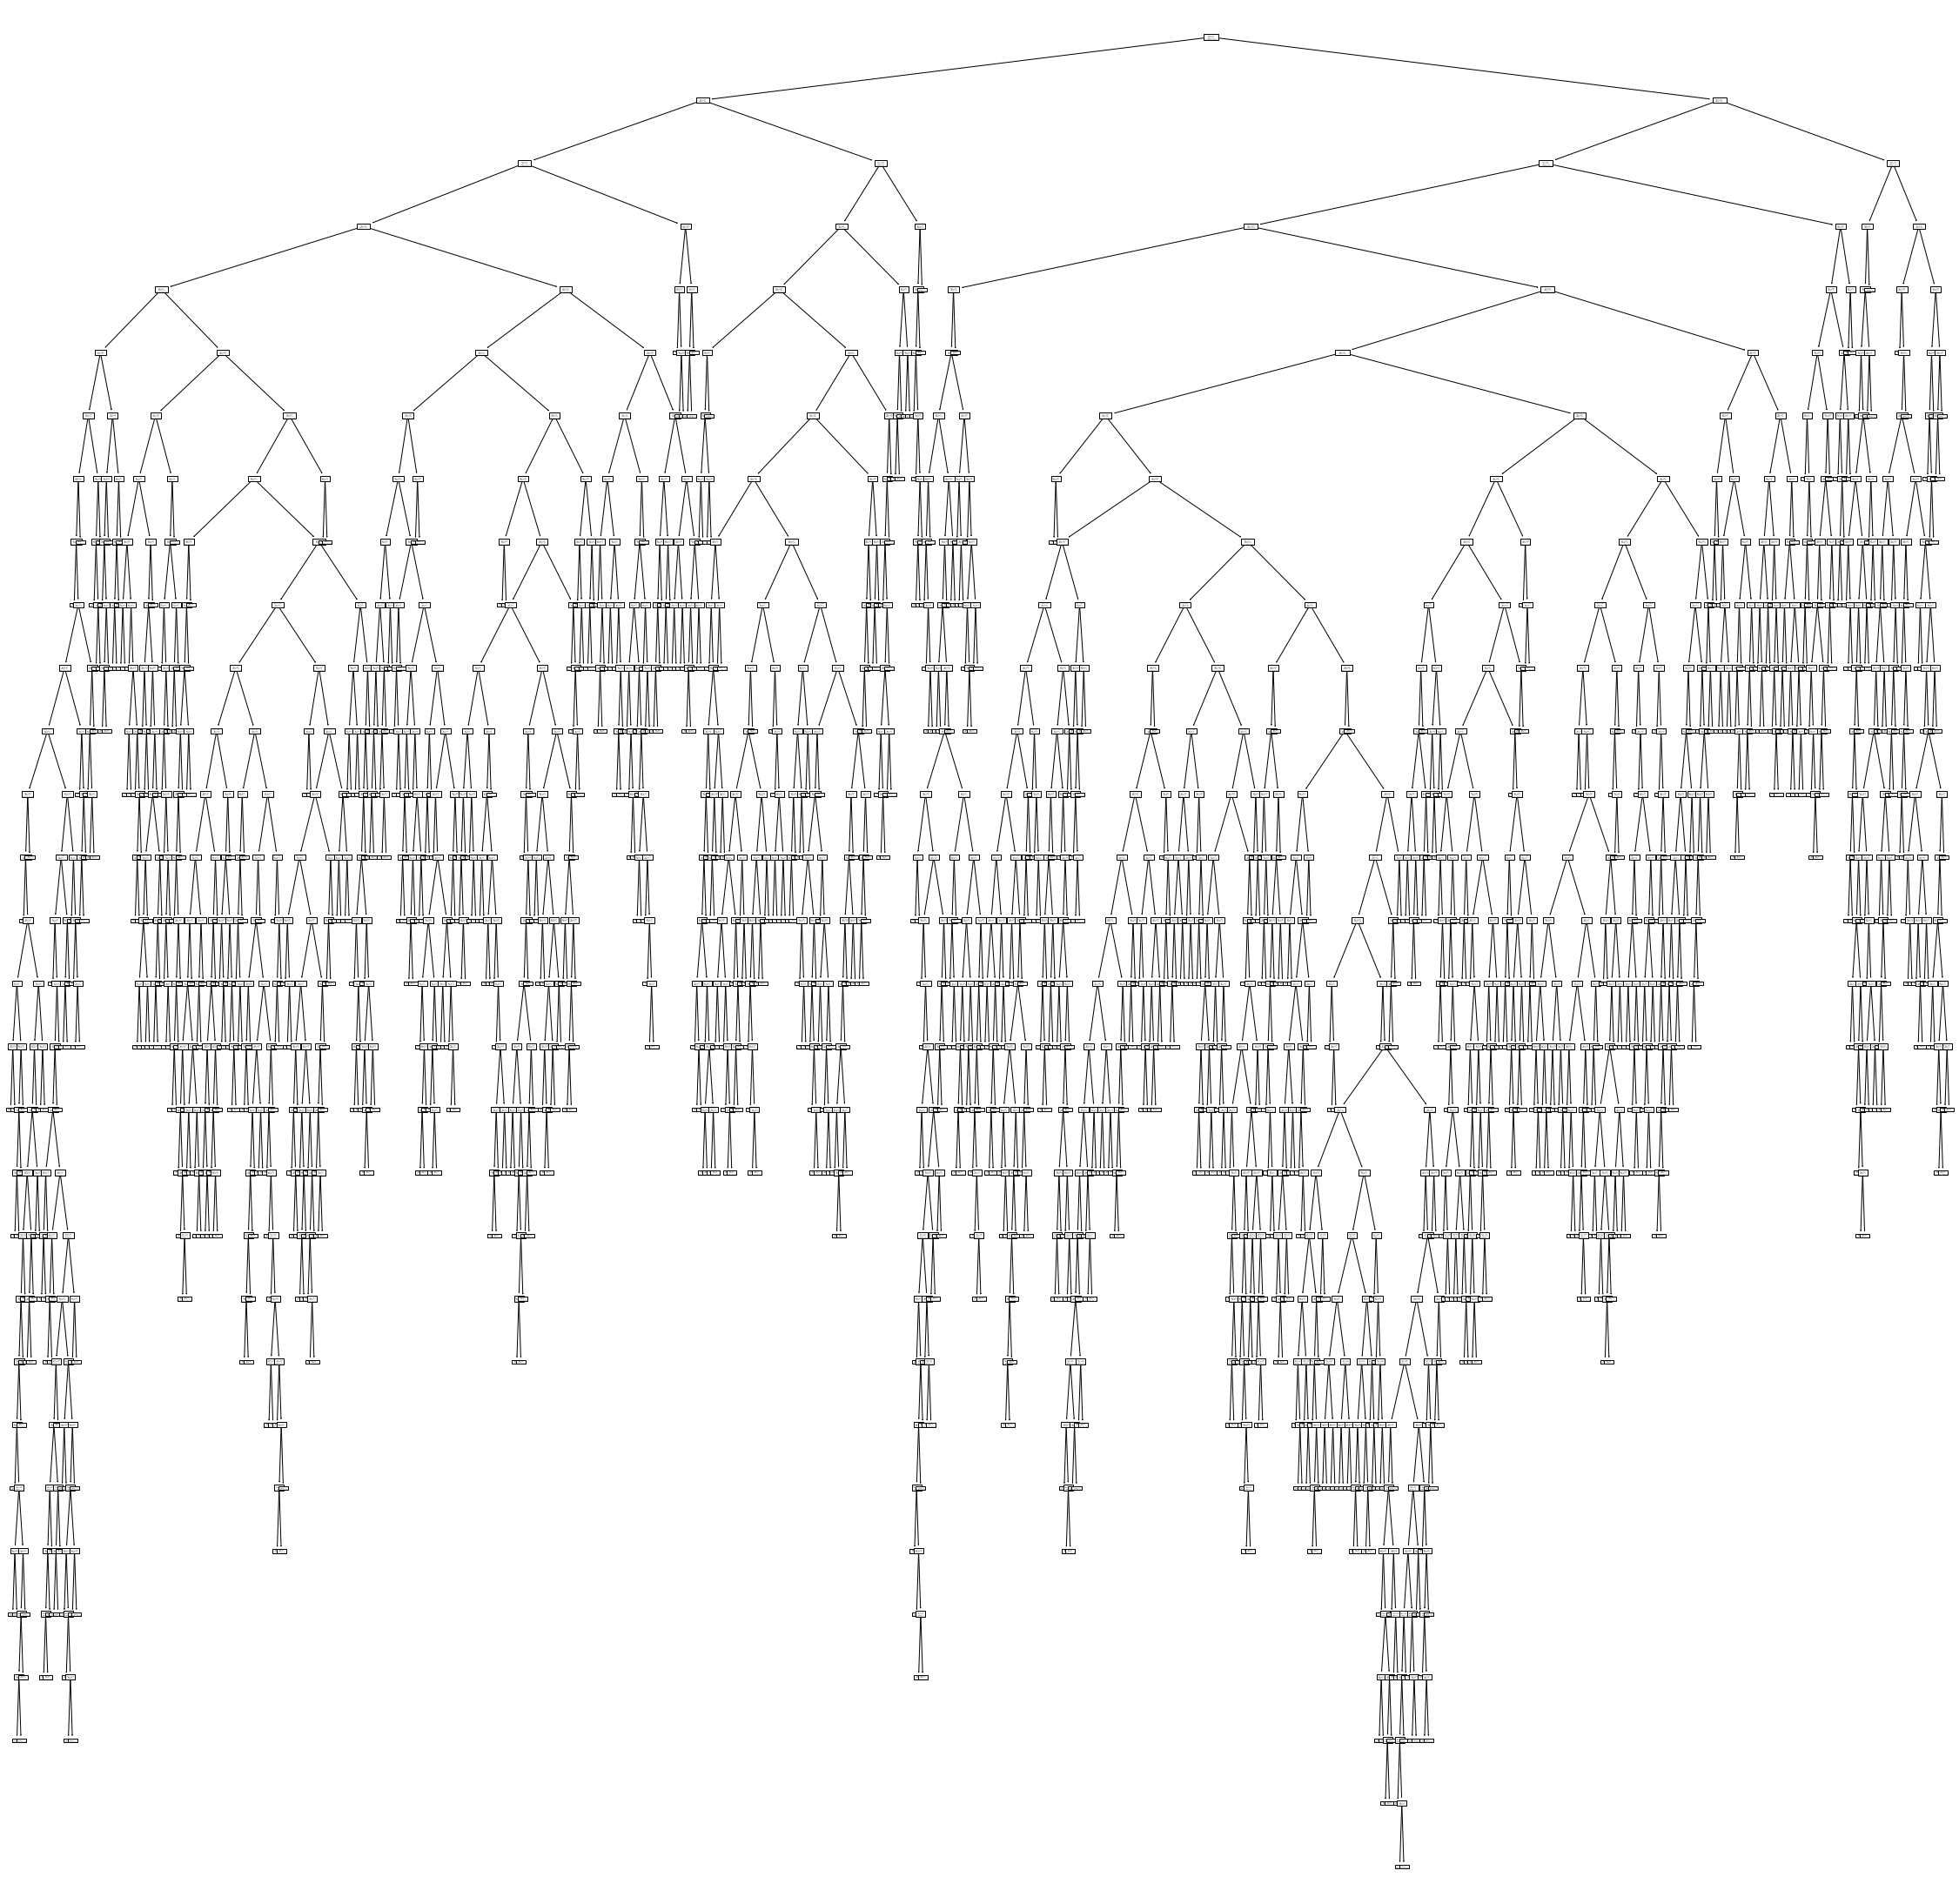

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

fig=plt.figure(figsize=(40, 40))
tree.plot_tree(model.fit(X_test,y_test))
plt.show()

Having a tree this huge, means that is difficult for the algorithm to use a variable to clearly split the data. That means that our variables have not a lot of relation with the variable we want to predict. This is seen when we check the accuracy, which is roughly a 55%, when 50% is the one observed by chance.

#### 3) Try two Random Forests Classification: one classifying the apartments with the previous categories as classes of apartments, and a second one where the numerical price is the classifier feature. 

#### Measure the out-of-bag accuracy (you will have to set the oob_score=True to be able to get within the variable oob_score_ the score otherwise is not computed). 

#### Which one works better?

In [58]:
#First one
from sklearn.ensemble import RandomForestRegressor

#Creating the dependent variable class

factor = pd.factorize(data['price_class'])
data.price_class = factor[0]
definitions = factor[1]


0    0
1    1
3    1
4    1
5    2
Name: price_class, dtype: int64
Int64Index([0, 1, 2, 3], dtype='int64')


In [60]:
data.iloc[:3]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_class
0,18666,Flat with Sunny Terrace,71615,Mireia And Maria,Sant Martí,el Camp de l'Arpa del Clot,41.40889,2.18555,Entire home/apt,130,3,1,2015-10-10,0.02,30,304,0
1,18674,Huge flat for 8 people close to Sagrada Familia,71615,Mireia And Maria,Eixample,la Sagrada Família,41.40420,2.17306,Entire home/apt,60,1,20,2019-10-19,0.25,30,312,1
3,25786,NICE ROOM AVAILABLE IN THE HEART OF GRACIA,108310,Pedro,Gràcia,la Vila de Gràcia,41.40145,2.15645,Private room,32,1,268,2019-11-06,2.38,1,46,1


In [62]:
# First model

X  = data[['neighbourhood_group','neighbourhood', 'latitude','longitude','room_type','minimum_nights','number_of_reviews', 'reviews_per_month','availability_365']]
X = pd.get_dummies(X, columns = ['neighbourhood_group', 'neighbourhood', 'room_type'])
y = data['price_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [64]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [66]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42, oob_score=True)
classifier.fit(X_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

In [70]:
# Predicting the Test set results

y_pred = classifier.predict(X_test)

print(pd.crosstab(y_test, y_pred, rownames=['Actual Category'], colnames=['Predicted Category']))

Predicted Category    0     1    2    3
Actual Category                        
0                   330    87  160    4
1                    53  1534  123   69
2                   219   326  329    5
3                     4   339   15  112


In [71]:
print (classifier.oob_score_)

0.5783370786516854


And now let's do the same for the second model.

In [73]:
X  = data[['price']]
y = data['price_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [74]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42, oob_score=True)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print(pd.crosstab(y_test, y_pred, rownames=['Actual Category'], colnames=['Predicted Category']))

Predicted Category    0     1    2    3
Actual Category                        
0                   581     0    0    0
1                     0  1779    0    0
2                     0     0  879    0
3                     0     0    0  470


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Predicting the price class using the price, give us a performance of 100%. This is because price_class is a direct transformation of the variable class, having a 100% of correlation between these variables.